In [15]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

In [16]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Flatten the labels from (None, 1) to (None,) so that it's integer-encoded
y_train = y_train.flatten()
y_test = y_test.flatten()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape the images (no need to change the shape as it's already (32, 32, 3))

In [17]:
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the input image to a 1D vector of size 3072
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")  # Output layer with 10 classes (0-9)
])

C:\Users\sakshi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Compile the model with chosen optimizer and sparse categorical cross-entropy loss
optimizer = SGD()  # You can change this to Adam() for using the Adam optimizer

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=11, validation_data=(x_test, y_test))

Epoch 1/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2736 - loss: 2.0144 - val_accuracy: 0.3409 - val_loss: 1.8039
Epoch 2/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3842 - loss: 1.7352 - val_accuracy: 0.3890 - val_loss: 1.7055
Epoch 3/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4142 - loss: 1.6513 - val_accuracy: 0.4079 - val_loss: 1.6564
Epoch 4/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4340 - loss: 1.5951 - val_accuracy: 0.4259 - val_loss: 1.5895
Epoch 5/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4478 - loss: 1.5513 - val_accuracy: 0.4340 - val_loss: 1.5898
Epoch 6/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4636 - loss: 1.5159 - val_accuracy: 0.4511 - val_loss: 1.5505
Epoch 7/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4758 - loss: 1.4748 - val_accuracy: 0.4097 - val_loss: 1.6622
Epoch 8/11
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4793 - loss: 1.4586 -

In [5]:

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4780 - loss: 1.4662
Test accuracy: 47.89%


In [6]:
# Make predictions on the test data
y_pred = model.predict(x_test)

# Convert the predictions to the class with the highest probability
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the classification report
report = classification_report(y_test, y_pred_classes)
print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.44      0.65      0.53      1000
           1       0.69      0.52      0.59      1000
           2       0.36      0.43      0.39      1000
           3       0.33      0.48      0.39      1000
           4       0.47      0.27      0.35      1000
           5       0.39      0.35      0.37      1000
           6       0.57      0.45      0.50      1000
           7       0.59      0.51      0.54      1000
           8       0.54      0.66      0.60      1000
           9       0.61      0.47      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



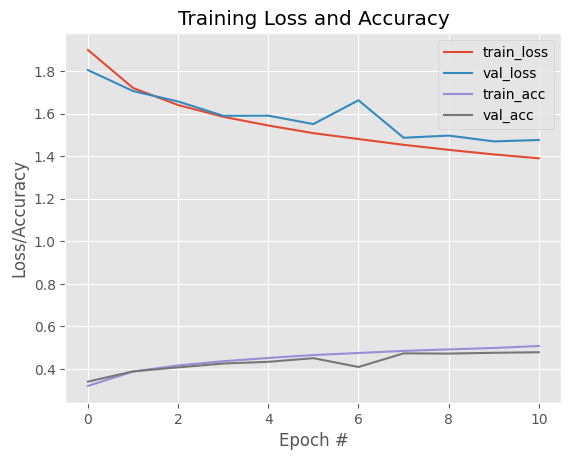

In [7]:
# Plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 11), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 11), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 11), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 11), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


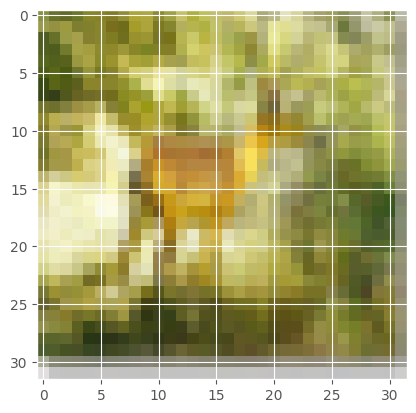

Predicted label: deer


In [18]:
# Make a prediction on a single test image
predicted_value = model.predict(x_test)

# Visualize the test image
plt.imshow(x_test[500])
plt.show()

# Print the predicted class label for the image
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Predicted label:", class_names[np.argmax(predicted_value[500], axis=0)])